In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import matplotlib.patches
from matplotlib.collections import PatchCollection
def get_angle_plot(angle, offset = 0.5, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    # angle = angle / 180 * np.pi

    if color is None:
        color = 'k' 
    
    arc = matplotlib.patches.Arc(xy=origin,
                                 width=len_x_axis*offset, 
                                 height=len_y_axis*offset,
                                 angle=0,
                                 theta1=0,
                                 theta2=angle,
                                 alpha=1,
                                 color=color,
                                 label=str(angle)+u"\u00b0")
                                 
    p = PatchCollection([arc], alpha=0.4)
    p.set_array(np.array('k'))

    return p


In [3]:
def add_angle(ax,
              angle,
              offset =[0.5],
              color = None,
              origin = [0,0],
              len_x_axis = 1,
              len_y_axis = 1,
              up_angle_annot=True,
              projections=True,
              projection_annotation=True,
              dot_annotation=True):

    # angle = angle / 180 * np.pi

    if color is None:
        color = 'k' 


    if up_angle_annot:
        for os in offset:
            arc = matplotlib.patches.Arc(xy=origin,
                                    width=len_x_axis*os, 
                                    height=len_y_axis*os,
                                    angle=0,
                                    theta1=0,
                                    theta2=angle,
                                    alpha=1,
                                    color=color)
            ax.add_patch(arc)
    else:
        for os in offset:
            arc = matplotlib.patches.Arc(xy=origin,
                                    width=len_x_axis*os, 
                                    height=len_y_axis*os,
                                    angle=0,
                                    theta1=-abs(angle),
                                    theta2=0,
                                    alpha=1,
                                    color=color)
            ax.add_patch(arc)

    angle_rad = angle / 180 * np.pi
    ax.text(x=len_x_axis*offset[-1]*.5*np.cos(angle_rad / 2),
            y=len_x_axis*offset[-1]*.5*np.sin(angle_rad / 2),
            s=str(angle)+u"\u00b0",
            color=color,
            size=16)

    ax.plot([0, np.cos(angle_rad)], [0, np.sin(angle_rad)], c=color, lw=1)

    if dot_annotation:
        ax.text(x=np.cos(angle_rad) + 0.05,
                y=np.sin(angle_rad)+0.05,
                s=r'$\left(\cos({angle}^\circ), \sin({angle}^\circ)\right)$'.format(angle=angle),
                size=12,
                color=color)


    if projections:
        ax.plot([np.cos(angle_rad), np.cos(angle_rad)], [0, np.sin(angle_rad)], c=color, lw=0.7, ls='--')
        ax.plot([0, np.cos(angle_rad)], [np.sin(angle_rad), np.sin(angle_rad)], c=color, lw=0.7, ls='--')
        if projection_annotation:
            ax.text(x=np.cos(angle_rad),
                    y=-0.08,
                    s=f'$x$',
                    size=12,
                    color=color)
            ax.text(x=-0.08,
                    y=np.sin(angle_rad),
                    s=f'$y$',
                    size=12,
                    color=color)



                                

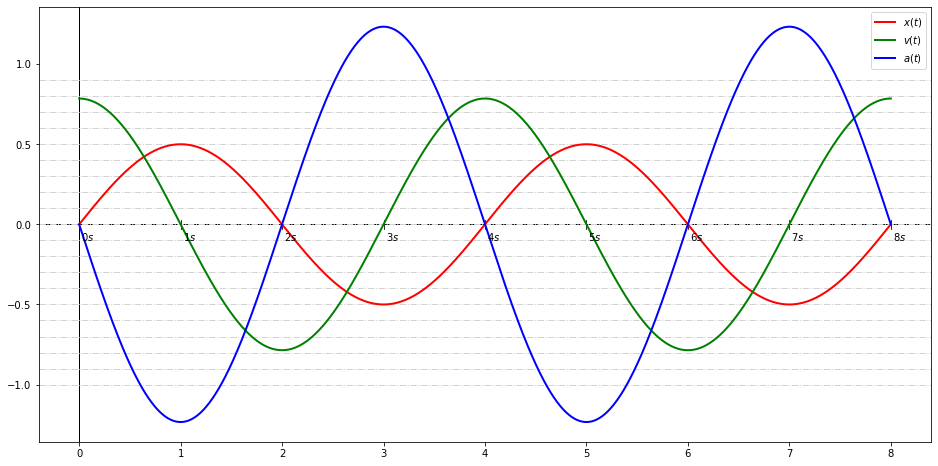

In [12]:
xmin, xmax = 0, 8
# xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(0, xmin, xmax):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-1, 1, 0.1):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')

for t,l in zip(np.arange(xmin, xmax+1, 1),
[f'${a}s$' for a in np.arange(0, 9, 1)]):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.1,s=l)

# ax.plot(x, np.sin(x), c='g', label='$\sin(x)$', lw=2)
ax.plot(x, 0.5*np.sin(2*np.pi/4*x), c='r', label='$x(t)$', lw=2)
ax.plot(x, 0.5*2*np.pi/4*np.cos(2*np.pi/4*x), c='g', label='$v(t)$', lw=2)
ax.plot(x, -0.5*(2*np.pi/4)**2*np.sin(2*np.pi/4*x), c='b', label='$a(t)$', lw=2)

ax.legend()
plt.savefig('./pics/ruch_drag1.png')
plt.show()

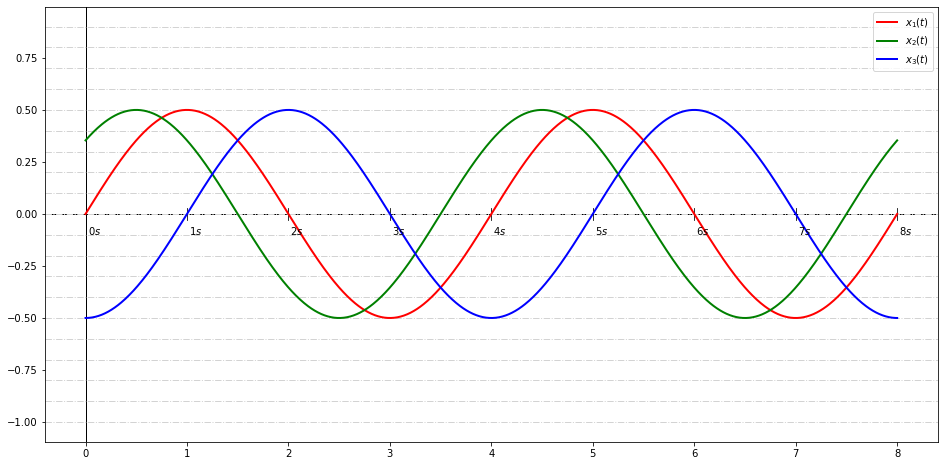

In [16]:
xmin, xmax = 0, 8
# xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(0, xmin, xmax):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-1, 1, 0.1):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')

for t,l in zip(np.arange(xmin, xmax+1, 1),
[f'${a}s$' for a in np.arange(0, 9, 1)]):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.1,s=l)

ax.plot(x, 0.5*np.sin(2*np.pi/4*x), c='r', label='$x_1(t)$', lw=2)
ax.plot(x, 0.5*np.sin(2*np.pi/4*x+np.pi/4), c='g', label='$x_2(t)$', lw=2)
ax.plot(x, 0.5*np.sin(2*np.pi/4*x+3*np.pi/2), c='b', label='$x_3(t)$', lw=2)

ax.legend()
plt.savefig('./pics/ruch_drag2.png')
plt.show()

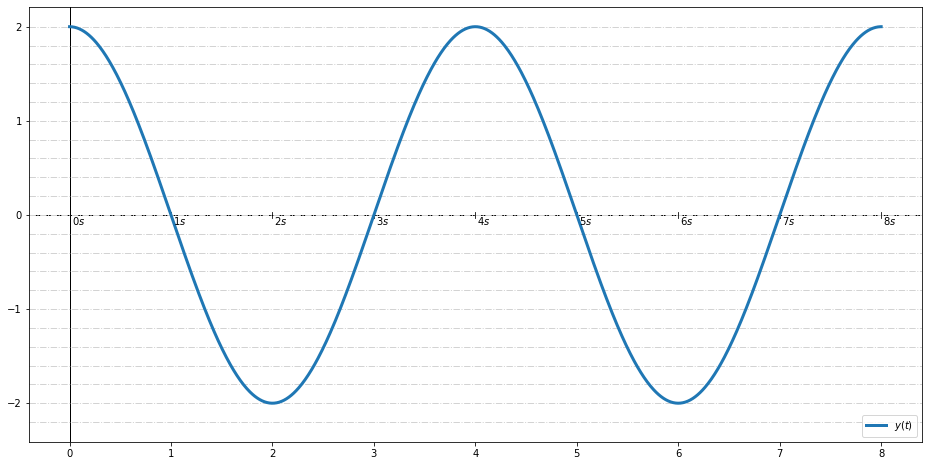

In [28]:
xmin, xmax = 0, 8
# xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(0, xmin, xmax):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-2.2, 2.2, 0.2):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')

for t,l in zip(np.arange(xmin, xmax+1, 1),
[f'${a}s$' for a in np.arange(0, 9, 1)]):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.1, s=l)

ax.plot(x, 2*np.cos(2*np.pi/4*x), label='$y(t)$', lw=3)
# ax.plot(x, 2*np.cos(2*np.pi/4*x), c='g', label='$z(t)$', lw=2)


ax.legend()
plt.savefig('./pics/ruch_drag7.png')
plt.show()